In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data=pd.read_csv('/content/IRIS.csv')

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Exploratory Data Analysis

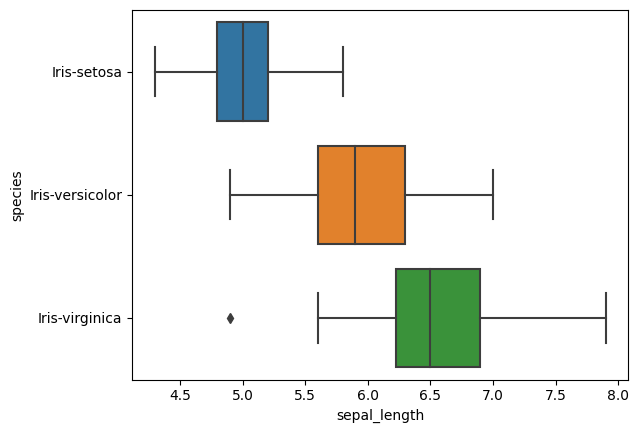

In [ ]:

sns.boxplot(data=data, x='sepal_length', y='species')
plt.show()

# This plot shows that Iris-virginica has one outlier.

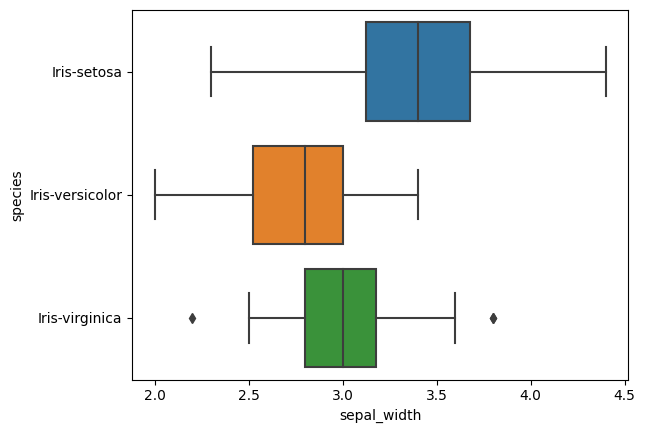

In [ ]:
sns.boxplot(data=data, x='sepal_width', y='species')
plt.show()

# This plot shows that Iris-virginica has two outliers.

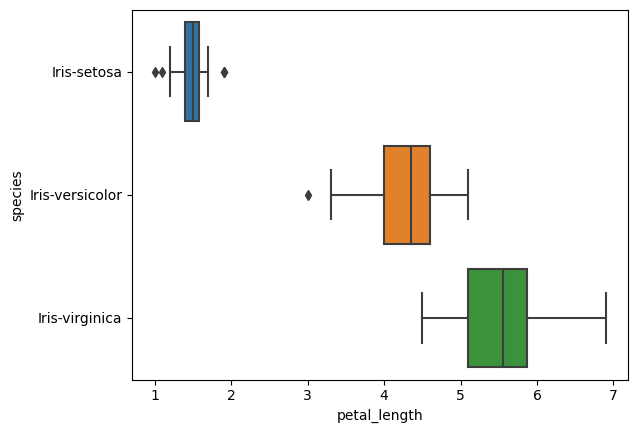

In [ ]:
sns.boxplot(data=data, x='petal_length', y='species')
plt.show()

# Iris-setosa has three otliers and Iris-versicolor has one outlier.

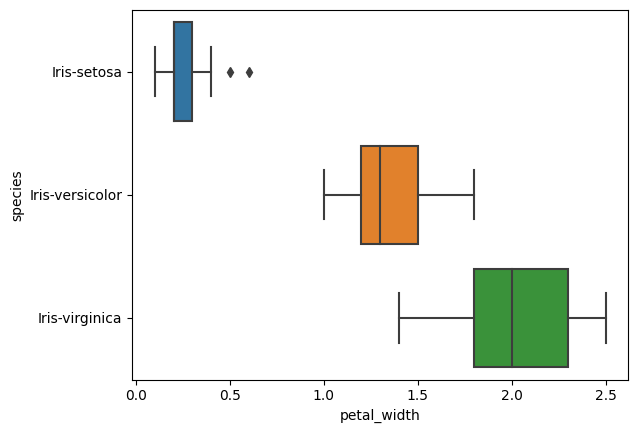

In [ ]:
sns.boxplot(data=data, x='petal_width', y='species')
plt.show()
#Iris-setosa has two outliers.

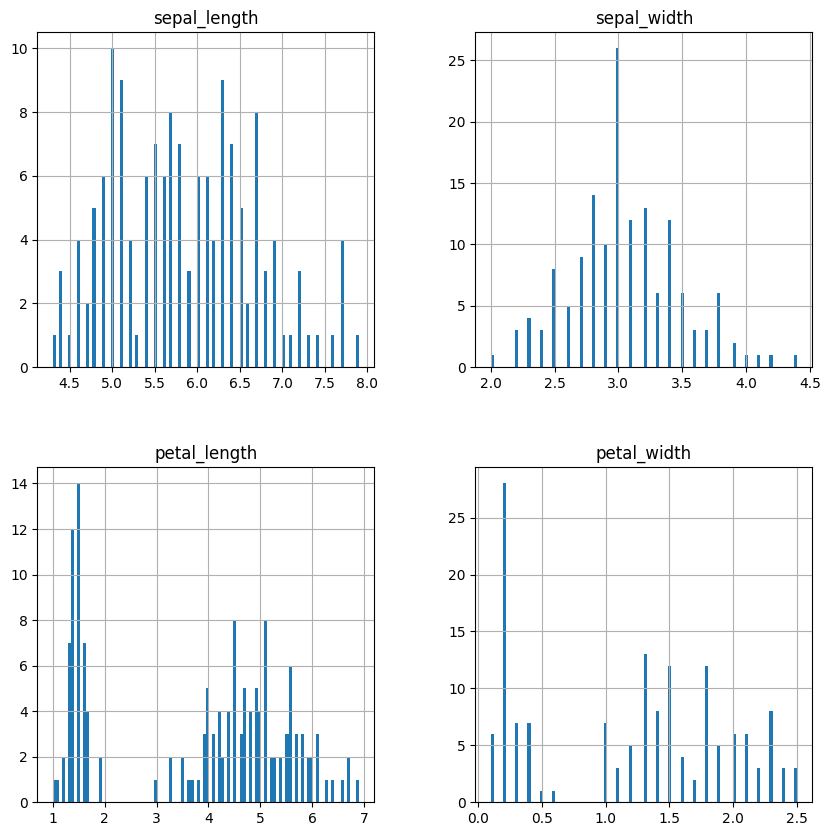

In [ ]:
data.hist(bins=100, figsize=(10,10))
plt.show()

# this shows that sepal_width shows a bit of normal distribution.

<ipython-input-20-d58a7c583bfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=data.corr()


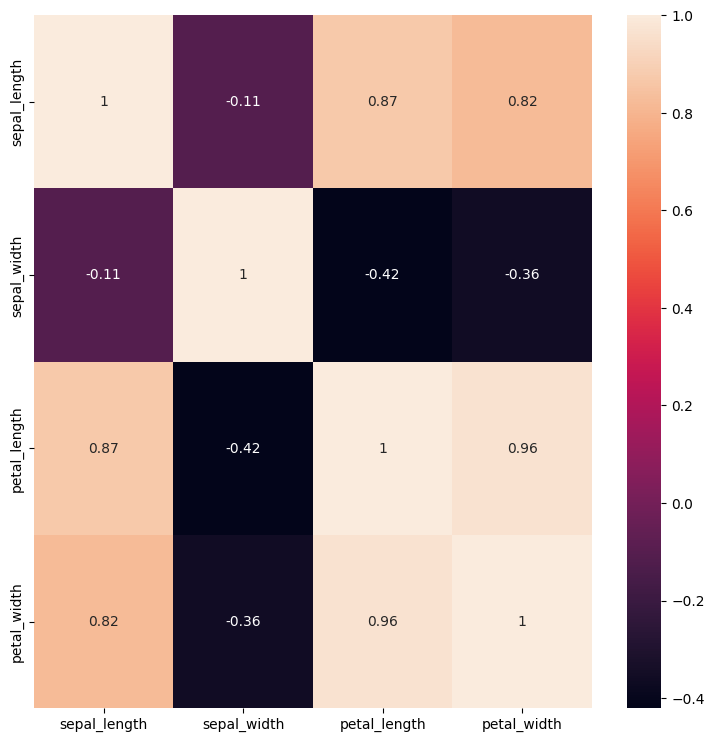

In [ ]:
correl=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(data=correl, annot=True)
plt.show()

In [ ]:
label_enc=LabelEncoder()

In [ ]:
data['species']=label_enc.fit_transform(data['species'])

In [ ]:
type(data['species'])

pandas.core.series.Series

In [ ]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
# since the dataset does not contain any null values, therefore there is no need for imputing.
# also there are only four features, so we will not apply feature selection also.

In [ ]:
# separating target variable.
y=data['species']

In [ ]:
X=data.drop('species', axis=1)

In [ ]:
y.shape

(150,)

In [ ]:
X.shape

(150, 4)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>

<Axes: ylabel='Density'>

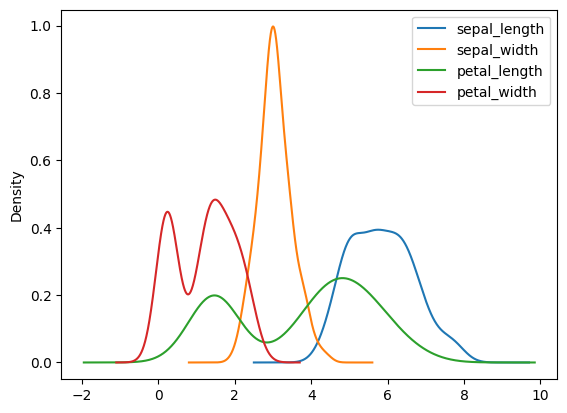

In [ ]:
# Checking whether the features are of same scale or not.

X.plot.kde()

In [ ]:
ss=StandardScaler()


In [ ]:
X_new=ss.fit_transform(X)

In [ ]:
X_new.shape

(150, 4)

In [ ]:
X_new_df=pd.DataFrame(data=X_new, columns=X.columns)

<Axes: ylabel='Density'>

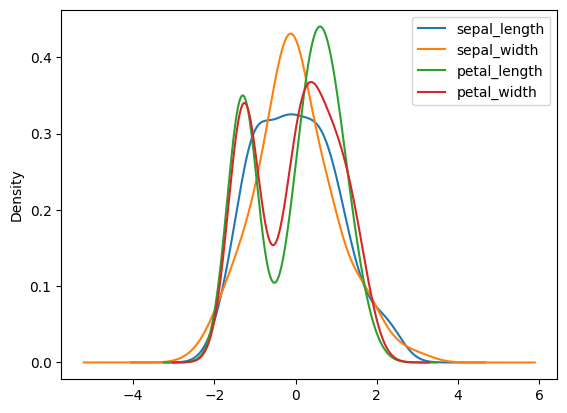

In [ ]:
X_new_df.plot.kde()
# Now the features are brought on the same scale.

In [ ]:
# splitting of train and test datal=['Iris-setosa','Iris-versicolor','Iris-virginica']
X_train, X_test, y_train, y_test=train_test_split(X_new_df, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
y_train.value_counts()

1    41
0    40
2    39
Name: species, dtype: int64

In [ ]:
# Estimator

xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb.feature_importances_

array([0.0110771 , 0.02904883, 0.75245064, 0.20742337], dtype=float32)

In [ ]:
y_pred=xgb.predict(X_test)


In [ ]:
score=xgb.score(X_test, y_test)

In [ ]:
score
# Highest accuracy obtained with XGBClassifier with no hyperparameter tuning.

1.0

In [ ]:
acc_score_0=accuracy_score(y_test, y_pred)
acc_score_0

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



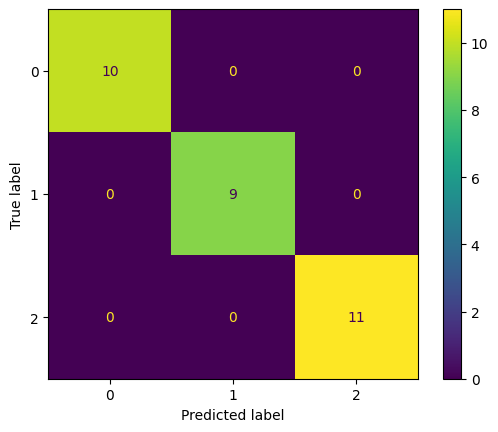

In [ ]:
cm_display=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='.5g')
cm_display

# Hyperparameter tuning.

In [ ]:
?XGBClassifier

In [ ]:
param_grid={'n_estimators':[5,10,15], 'max_depth':[3,6], 'max_leaves':[3,6,9]}

In [ ]:
xgb_grid=GridSearchCV(xgb, param_grid=param_grid, cv=5)

In [ ]:
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'max_depth': [3, 6], 'max_leaves': [3, 6, 9],
                         'n_estimators': [5, 10, 15]})

In [ ]:
xgb_grid.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype='<U12')

In [ ]:
xgb_grid.best_params_

{'max_depth': 3, 'max_leaves': 3, 'n_estimators': 5}

In [ ]:
y_hpt_pred=xgb_grid.predict(X_test)

In [ ]:
score_hpt=xgb_grid.score(X_test, y_test)

In [ ]:
score_hpt
# with hyperparameter also we gained maximum accuracy.

1.0

In [ ]:
acc_score=accuracy_score(y_test, y_hpt_pred)
acc_score

1.0

In [ ]:
print(classification_report(y_test, y_hpt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



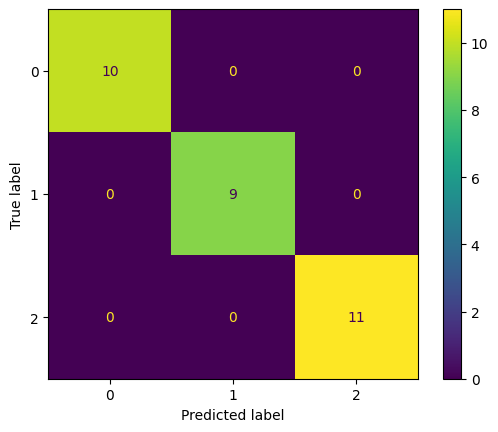

In [ ]:
cm_display_hpt=ConfusionMatrixDisplay.from_predictions(y_test, y_hpt_pred)